In [48]:
import numpy as np

In [49]:
def softmax(x):
    answer = np.exp(x)
    return answer / np.sum(np.exp(x))

c = 10
x = np.random.rand(c)
print(x) #print logits
ans = softmax(x)
print()
print(ans)

[0.42502002 0.57585777 0.29572844 0.19084093 0.43689563 0.5423541
 0.43945086 0.92357382 0.80163699 0.76764328]

[0.08698644 0.10114852 0.07643652 0.06882542 0.08802561 0.09781582
 0.08825082 0.14320913 0.12676933 0.1225324 ]


In [50]:
def ReLU(W, x, b):
    y = np.dot(W, x)
    return y + b

#input dimension
d_in = 10
#output dimension
d_out = 30

#input #create array with d_in * 1
x = np.ones((d_in, 1))
print(x)
#weight #create array with d_out * d_in
W = np.random.rand(d_out, d_in) * 10 - 5
#bias value
b = np.random.rand(d_out, 1) * 10 -5

y = np.maximum(0, ReLU(W, x, b))

print()
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

[[ 8.66055702]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [16.30146795]
 [ 9.26975281]
 [ 0.        ]
 [ 2.4079803 ]
 [ 0.        ]
 [ 0.        ]
 [ 7.24969675]
 [20.61977559]
 [11.3698034 ]
 [ 0.        ]
 [17.59710847]
 [ 0.        ]
 [ 3.38440857]
 [11.98986008]
 [ 0.        ]
 [ 0.        ]
 [ 7.77763297]
 [ 7.74124896]
 [ 0.        ]
 [13.7112966 ]
 [ 0.        ]
 [ 0.        ]]


In [51]:
import pandas as pd;

In [52]:
df = pd.read_csv('467410-2022-08.csv')

def check_value(value):
    if value == 'UVI Max':
        return 'UVI Intensity'
    else:
        if 0 <= int(value) <= 2:
            return '低'
        elif 3 <= int(value) <= 5:
            return '中'
        elif 6 <= int(value) <= 7:
            return '高'
        elif 8 <= int(value) <= 10:
            return '甚高'
        elif int(value) >= 11:
            return '極高'
    
df['紫外線強度等級'] = df['日最高紫外線指數'].apply(check_value)
filtered_df = df[df['紫外線強度等級'].isin(['低', '中', '高', '甚高', '極高'])]

#count = filtered_df['紫外線強度等級'].value_counts()

count_arr = {'低': 0, '中': 0, '高': 0, '甚高': 0, '極高': 0}

for level, count in filtered_df['紫外線強度等級'].value_counts().items():
    count_arr[level] = count

print(df)
print()

for level, count in count_arr.items():
    print(f'{level}: {count}')

   觀測時間(day) 測站氣壓(hPa) 海平面氣壓(hPa) 測站最高氣壓(hPa)        測站最高氣壓時間(LST)  \
0    ObsTime   StnPres    SeaPres  StnPresMax       StnPresMaxTime   
1         01    1004.2     1007.3      1005.5  2022/08/01 22:09:00   
2         02    1005.9     1009.0      1008.1  2022/08/02 10:34:00   
3         03    1006.1     1009.1      1007.3  2022/08/03 22:08:00   
4         04    1006.7     1009.8      1008.5  2022/08/04 21:33:00   
5         05    1006.7     1009.8      1007.7  2022/08/05 00:01:00   
6         06    1005.5     1008.5      1007.3  2022/08/06 00:01:00   
7         07    1005.3     1008.4      1007.3  2022/08/07 23:00:00   
8         08    1005.4     1008.5      1007.0  2022/08/08 00:01:00   
9         09    1005.1     1008.2      1006.8  2022/08/09 22:13:00   
10        10    1005.7     1008.8      1007.8  2022/08/10 21:25:00   
11        11    1006.7     1009.8      1008.5  2022/08/11 22:16:00   
12        12    1006.6     1009.7      1007.8  2022/08/12 10:01:00   
13        13    1005

In [53]:
def division(row):

    mm = row['降水量(mm)']
    hour = row['降水時數(hour)']

    if mm == 'Precp' or hour == 'PrecpHour':
        return 'Precp / PrecpHour'
    else:
        if mm == 'T':
                return '0'
        else:
            mm_float = float(mm)
            hour_float = float(hour)
            if hour_float != 0:
                        return mm_float / hour_float
            else:
                return '0'
        
df = pd.read_csv('467410-2022-08.csv')
df['降水强度(mm/hr)'] = df.apply(division, axis=1)

#print(df)

#store the row 0 of that column
row0 = df.iloc[0]

df['降水强度(mm/hr)'] = pd.to_numeric(df['降水强度(mm/hr)'], errors='coerce')
average = df['降水强度(mm/hr)'].mean()

#print(average)

larger_df = df[df['降水强度(mm/hr)'] > average]

row0_df = pd.DataFrame([row0])

larger_df = pd.concat([row0_df, larger_df])

print(larger_df)

   觀測時間(day) 測站氣壓(hPa) 海平面氣壓(hPa) 測站最高氣壓(hPa)        測站最高氣壓時間(LST)  \
0    ObsTime   StnPres    SeaPres  StnPresMax       StnPresMaxTime   
2         02    1005.9     1009.0      1008.1  2022/08/02 10:34:00   
7         07    1005.3     1008.4      1007.3  2022/08/07 23:00:00   
9         09    1005.1     1008.2      1006.8  2022/08/09 22:13:00   
10        10    1005.7     1008.8      1007.8  2022/08/10 21:25:00   
15        15    1004.1     1007.2      1005.1  2022/08/15 21:49:00   
16        16    1004.3     1007.4      1006.0  2022/08/16 22:42:00   
17        17    1004.8     1007.9      1006.4  2022/08/17 21:48:00   
18        18    1004.5     1007.6      1005.8  2022/08/18 22:53:00   

   測站最低氣壓(hPa)        測站最低氣壓時間(LST)        氣溫(℃) 最高氣溫(℃)          最高氣溫時間(LST)  \
0   StnPresMin       StnPresMinTime  Temperature   T Max           T Max Time   
2       1003.9  2022/08/02 16:38:00         27.5    28.9  2022/08/02 00:01:00   
7       1003.4  2022/08/07 14:23:00         28.7    33.5

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

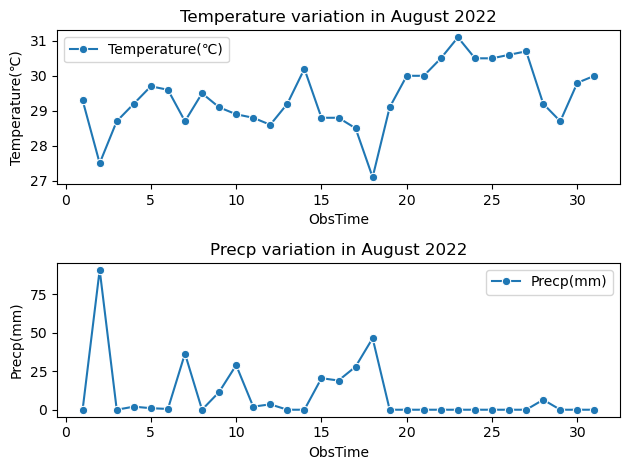

In [55]:
def replace_T_with_0(input):
    if pd.isna(input):  #check whether it is NaN
        return 0
    else:
        return input

df = pd.read_csv('467410-2022-08.csv')
df = df.iloc[1:]

df['觀測時間(day)'] = pd.to_numeric(df['觀測時間(day)'], errors='coerce')
df['氣溫(℃)'] = pd.to_numeric(df['氣溫(℃)'], errors='coerce')
df['降水量(mm)'] = pd.to_numeric(df['降水量(mm)'], errors='coerce')

df['觀測時間(day)'] = df['觀測時間(day)'].apply(replace_T_with_0)
df['氣溫(℃)'] = df['氣溫(℃)'].apply(replace_T_with_0)
df['降水量(mm)'] = df['降水量(mm)'].apply(replace_T_with_0)

fig, axes = plt.subplots(2, 1)

sns.lineplot(data=df, x='觀測時間(day)', y='氣溫(℃)', marker='o', label='Temperature(℃)', ax=axes[0])
axes[0].set_xlabel('ObsTime')
axes[0].set_ylabel('Temperature(℃)')
axes[0].set_title('Temperature variation in August 2022')
axes[0].legend()

sns.lineplot(data=df, x='觀測時間(day)', y='降水量(mm)', marker='o', label='Precp(mm)', ax=axes[1])
axes[1].set_xlabel('ObsTime')
axes[1].set_ylabel('Precp(mm)')
axes[1].set_title('Precp variation in August 2022')
axes[1].legend()

plt.tight_layout()
plt.show()

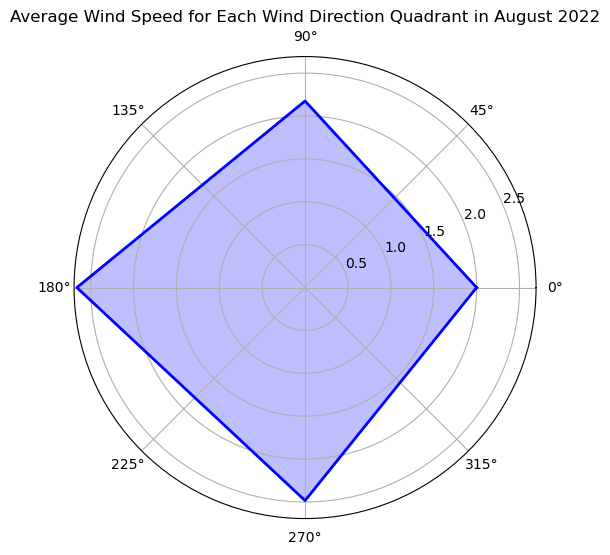

In [56]:
df = pd.read_csv('467410-2022-08.csv')
df = df.iloc[1:]
df['風向(360degree)'] = pd.to_numeric(df['風向(360degree)'], errors='coerce')
df['風速(m/s)'] = pd.to_numeric(df['風速(m/s)'], errors='coerce')

df['風向_quadrant'] = pd.cut(df['風向(360degree)'], bins=[0, 90, 180, 270, 360], right=False, labels=['0-90', '90-180', '180-270', '270-360'])
avg_ws_quadrant = df.groupby('風向_quadrant')['風速(m/s)'].mean()

#print(avg_ws_quadrant)

labels = avg_ws_quadrant.index
stats = avg_ws_quadrant.values
stats = np.concatenate((stats,[stats[0]])) 
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)

plt.title('Average Wind Speed for Each Wind Direction Quadrant in August 2022')
plt.show()

In [57]:
import sklearn
import pickle

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  

In [60]:
df = pd.read_csv('./course data/train.csv')

#df_x = df[['Sex', 'Age', 'Fare', 'Pclass']]    #same
df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']]     #same
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = DecisionTreeClassifier(
    criterion='gini',   
    #splitter='random',                        
    max_depth=4,                                
    max_leaf_nodes=12,
    min_samples_leaf=2, #2-5
    random_state=1012) 
# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.843939393939394
test accuracy: 0.8303030303030303


C:\Users\User\AppData\Local\Temp\ipykernel_20260\3543779996.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB from sklearn.naive_bayes

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB 

Using GaussianNB from sklearn.naive_bayes

In [62]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']]       
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = GaussianNB()

# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.7863636363636364
test accuracy: 0.8242424242424242


C:\Users\User\AppData\Local\Temp\ipykernel_20260\884219250.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using MultinomialNB from sklearn.naive_bayes

In [63]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age']]   
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = MultinomialNB(
    alpha=1,
    fit_prior=False
)

# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.7772727272727272
test accuracy: 0.8181818181818182


C:\Users\User\AppData\Local\Temp\ipykernel_20260\291371929.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using BernoulliNB from sklearn.naive_bayes

In [64]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']]     
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = BernoulliNB()   #alpha 沒差

# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.7848484848484848
test accuracy: 0.8181818181818182


C:\Users\User\AppData\Local\Temp\ipykernel_20260\3791473975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using CategoricalNB from sklearn.naive_bayes

In [65]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked', 'SibSp']]
df_y = df['Survived']

age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = CategoricalNB(
   alpha=2.9   #test accuracy is the same but when alpha = 2.9 or 3.1, train accuracy will be lower but still higher than train accuracy
)

# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.8196969696969697
test accuracy: 0.806060606060606


C:\Users\User\AppData\Local\Temp\ipykernel_20260\2275292072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using ExtraTreeClassifier from sklearn.tree

In [66]:
from sklearn.tree import ExtraTreeClassifier

In [68]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass']]
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = ExtraTreeClassifier(
    criterion='gini',   
    #splitter='random',                        
    max_depth=8,              #18 >> 97,82                  
    #max_leaf_nodes=12,
    min_samples_leaf=1, 
    random_state=1012) 
# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.8318181818181818
test accuracy: 0.8303030303030303


C:\Users\User\AppData\Local\Temp\ipykernel_20260\114534969.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using ExtraTreesClassifier from sklearn.ensemble

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked']]
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = ExtraTreesClassifier(
    criterion='gini',                          
    max_depth=11,                               
    #max_leaf_nodes=30,
    min_samples_leaf=1, 
    random_state=1012) 
# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.9454545454545454
test accuracy: 0.8363636363636363


C:\Users\User\AppData\Local\Temp\ipykernel_20260\1643893630.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using RandomForestClassifier from sklearn.ensemble

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked', 'SibSp']]    #train accuracy get lower, but test accuracy remains unchanged
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = RandomForestClassifier(   
    criterion='log_loss',           #same accuracy as criterion='entropy'
    max_depth=6,                      #6-12 ,train accuracy get higher but test accuracy remains nearly unchanged (when min_samples_leaf = default)      
    #max_leaf_nodes=20,
    min_samples_leaf=8, 
    #min_samples_split=8,
    random_state=1012) 
# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.8393939393939394
test accuracy: 0.8363636363636363


C:\Users\User\AppData\Local\Temp\ipykernel_20260\3888548608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)


Using KNeighborsClassifier from sklearn.neighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
df = pd.read_csv('./course data/train.csv')

df_x = df[['Sex', 'Age', 'Fare', 'Pclass', 'Embarked', 'SibSp']]
df_y = df['Survived']


age = df_x['Age'].to_numpy().reshape(-1, 1)

imputer = SimpleImputer(strategy='median')
#First, transform the age column to numpy format (-1:number of row in dataset)
imputer.fit(age)
df_x['Age'] = imputer.transform(age)

#Remove outliers
q1, q3 = np.quantile(df_x['Age'], [0.25, 0.75])
low = q1 - 1.5 * (q3 - q1)
high = q3 + 1.5 * (q3 - q1)
outlier_mask = (df_x['Age'] >= low) & (df_x['Age'] <= high)
df_x = df_x[outlier_mask]
df_y = df_y[outlier_mask]

#df_x.to_csv('df_x.csv')
#df_y.to_csv('df_y.csv')

le = LabelEncoder()
le.fit(df_x['Sex'])
df_x['Sex'] = le.transform(df_x['Sex'])

le = LabelEncoder()
le.fit(df_x['Embarked'])
df_x['Embarked'] = le.transform(df_x['Embarked'])

# 分割 train and test sets，random_state 固定為 1012
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, train_size=0.8, random_state=1012)

# 創造決策樹模型
model = KNeighborsClassifier(
    #weights='distance',    #only increase train accuracy to nearly 100, yet the test accuracy remains the same
    algorithm='auto',    #same accuracy as kd_tree
    leaf_size=12,       #1,2,11-20 will have better test accuracy
    p=1
) 
# 訓練決策樹模型
model.fit(train_x, train_y)                       

# 確認模型是否訓練成功
pred_train = model.predict(train_x)                   
# 計算準確度
train_acc = accuracy_score(train_y, pred_train)             

# 輸出準確度
print('train accuracy: {}'.format(train_acc)) 

# 確認模型是否訓練成功
pred_test = model.predict(test_x)                   
# 計算準確度
test_acc = accuracy_score(test_y, pred_test)             

# 輸出準確度
print('test accuracy: {}'.format(test_acc)) 

train accuracy: 0.8166666666666667
test accuracy: 0.7636363636363637


C:\Users\User\AppData\Local\Temp\ipykernel_20260\2122662994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Age'] = imputer.transform(age)
